# Heart Disease Classification Project

On this project im gonna build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.  

#### 💾 Dataset
We're using the UCI Heart Disease Dataset from kaggle  
🔗 [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv)  

#### Features
`id` (Unique id for each patient)  
`age` (Age of the patient in years)  
`origin` (place of study)  
`sex` (Male/Female)  
`cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])  
`trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))  
`chol` (serum cholesterol in mg/dl)  
`fbs` (if fasting blood sugar > 120 mg/dl)  
`restecg` (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]  
`thalach:` maximum heart rate achieved  
`exang:` exercise-induced angina (True/ False)   
`oldpeak:` ST depression induced by exercise relative to rest  
`slope:` the slope of the peak exercise ST segment  
`ca:` number of major vessels (0-3) colored by fluoroscopy  
`thal:` [normal; fixed defect; reversible defect]  
`num:` the predicted attribute    

So let's get to it...  

In [69]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the datased
df = pd.read_csv("../data/heart_disease_uci.csv")

# taking a look at it
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [70]:
# Now let's look at our target column and its values
df.num.value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

From this we can say that:  

`0` = no heart disease  

`1` = mild heart disease  

`2` = moderate heart disease  

`3` = severe heart disease  

`4` = critical heart disease  

And what about missing values...?


In [71]:
# Chacking for missing values
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Exploratory Data Analysis of our Data

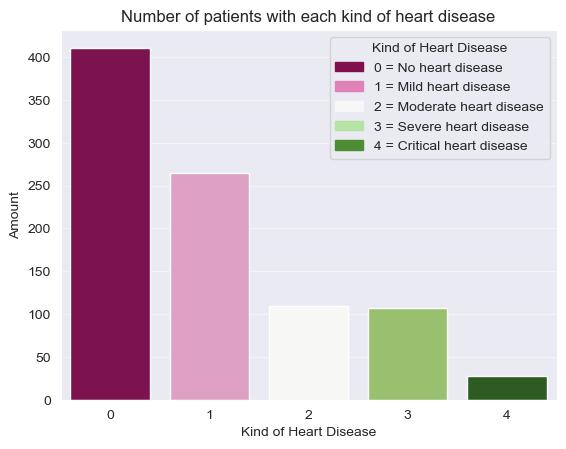

In [73]:
# let's make a quick check about the balance of our target value
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style('darkgrid')

# Convert value_counts() to a DataFrame
counts_df = df.num.value_counts().reset_index()
counts_df.columns = ['num', 'count']

legend_labels = [
    mpatches.Patch(color='#810f4d', label='0 = No heart disease'),
    mpatches.Patch(color='#e082b7', label='1 = Mild heart disease'),
    mpatches.Patch(color='#f7f7f7', label='2 = Moderate heart disease'),
    mpatches.Patch(color='#b6e3a3', label='3 = Severe heart disease'),
    mpatches.Patch(color='#4d8d34', label='4 = Critical heart disease'),
]
# Create bar plot
sns.barplot(data=counts_df, x='num', y='count', palette='PiYG', hue="num")
plt.legend(handles=legend_labels, title="Kind of Heart Disease")
plt.grid(True, alpha = 0.5, axis = 'y')
plt.grid(False, axis='x')
plt.xlabel("Kind of Heart Disease")
plt.ylabel("Amount")
plt.title("Number of patients with each kind of heart disease");

Mean of age: 53.51086956521739
Median of age: 54.0
Mode of age: 54


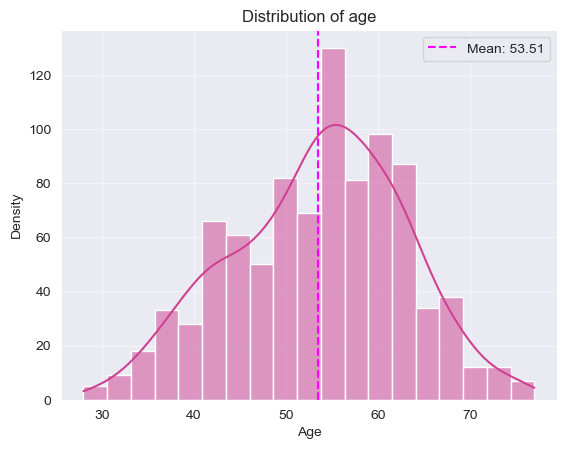

In [74]:
# let's see how's the age distribution
sns.histplot(data=df, x='age', kde=True, color=sns.color_palette('PiYG')[0])
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True, alpha=0.5)

plt.axvline(np.mean(df.age), color = 'fuchsia', linestyle="--", label = f'Mean: {np.mean(df.age):.2f}')
plt.legend()

print(f"Mean of age: {np.mean(df.age)}")
print(f"Median of age: {np.median(df.age)}")
print(f"Mode of age: {df.age.mode()[0]}") # 0 because it returns a series

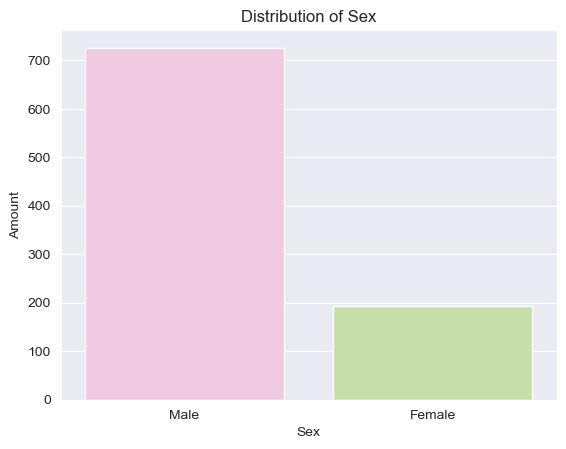

In [75]:
# Let's plot now the distribution of males and females
sex_counts = df.sex.value_counts().reset_index()
sex_counts.columns = ["sex", "count"]

sns.barplot(sex_counts, x = "sex", y="count", palette= 'PiYG', hue= "sex")
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Amount");

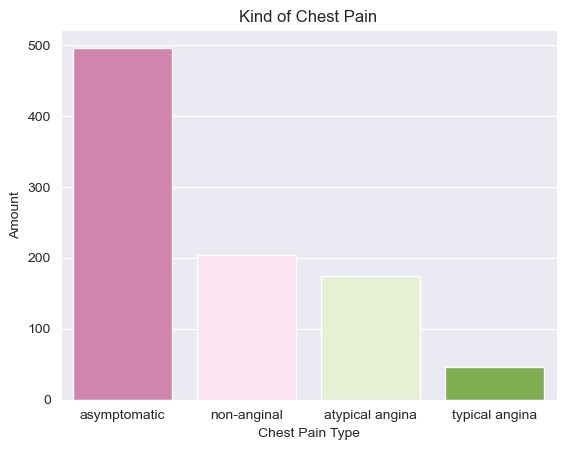

In [76]:
# let's check the different chest pain types and how many occurences those have on our dataset
cp_counts = df.cp.value_counts().reset_index()

sns.barplot(cp_counts, x = "cp", y ="count", palette="PiYG", hue = "cp")
plt.title("Kind of Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount");


Now we're goint to see the correlation between having heart disease and the different fatures of the dataset, but first, we have to determine WHO has heart disease, because now we have 5 differente levels:  
  
`0` = no heart disease  

`1` = mild heart disease  

`2` = moderate heart disease  

`3` = severe heart disease  

`4` = critical heart disease  

But, isn't levels 1, 2, 3 and 4 just having heart disease? imo, absolutely , so let's change that and turn it into a **binary classification**

In [77]:
df["target"] = df["num"].apply(lambda x: 1 if x in [1,2,3,4] else 0)
df["target"].value_counts()

target
1    509
0    411
Name: count, dtype: int64

In [78]:
# now we can drop the num column
df = df.drop("num", axis = 1)
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


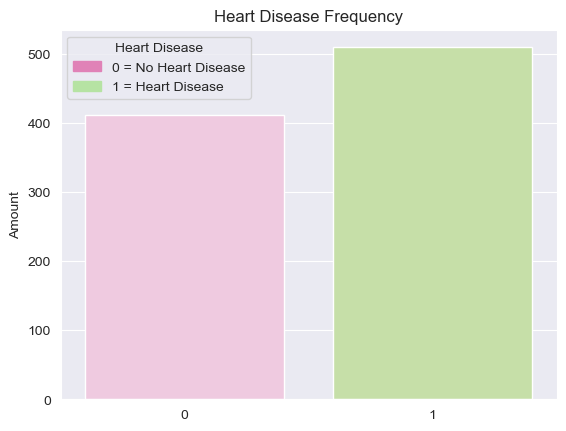

In [79]:
# Let's visualize the difference between how many people have and how many people do not have heart disease
target_count = df.target.value_counts().reset_index()

legend_labels = [
    mpatches.Patch(color='#e082b7', label='0 = No Heart Disease'),
    mpatches.Patch(color='#b6e3a3', label='1 = Heart Disease'),
]

sns.barplot(data=target_count, x = "target", y = "count", palette="PiYG", hue = "target")
plt.legend(handles=legend_labels, title="Heart Disease")
plt.title("Heart Disease Frequency")
plt.xlabel("")
plt.ylabel("Amount");


Now we're going to look at the correlation beetween the different features and the target column, comparing things such as sex, max heart rate, chest pain type, etc.

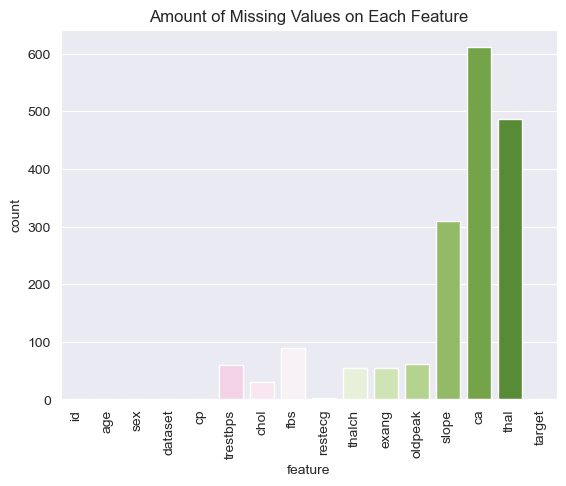

In [80]:
# first let's take a quick look at the missing values
missing_count = df.isna().sum().reset_index()
missing_count.columns = ["feature", "count"]

sns.barplot(data=missing_count, x="feature", y="count", palette="PiYG", hue= "feature")
plt.xticks(rotation=90)
plt.title("Amount of Missing Values on Each Feature");

Now we know which columns have the larger amount of missing values, we're goint to take care of this later...  
Now let's plot some correlations


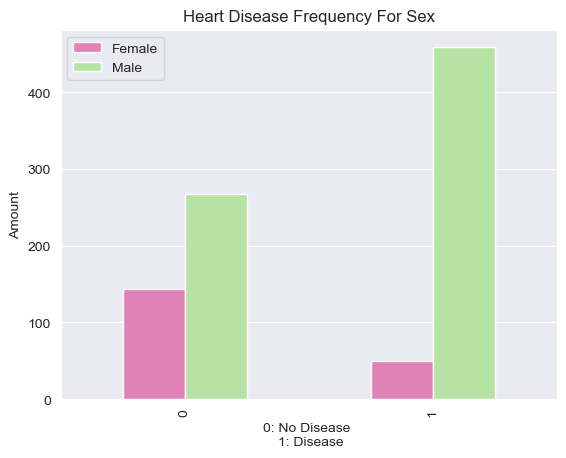

In [81]:
# let's see the correlation between sex and heart disease
sex_target = pd.crosstab(df.target, df.sex).plot(kind="bar", color = ['#e082b7', '#b6e3a3'])

plt.grid(False)
plt.grid(True, axis='y')
plt.title("Heart Disease Frequency For Sex")
plt.legend(["Female", "Male"])
plt.xlabel("0: No Disease \n 1: Disease")
plt.ylabel("Amount");

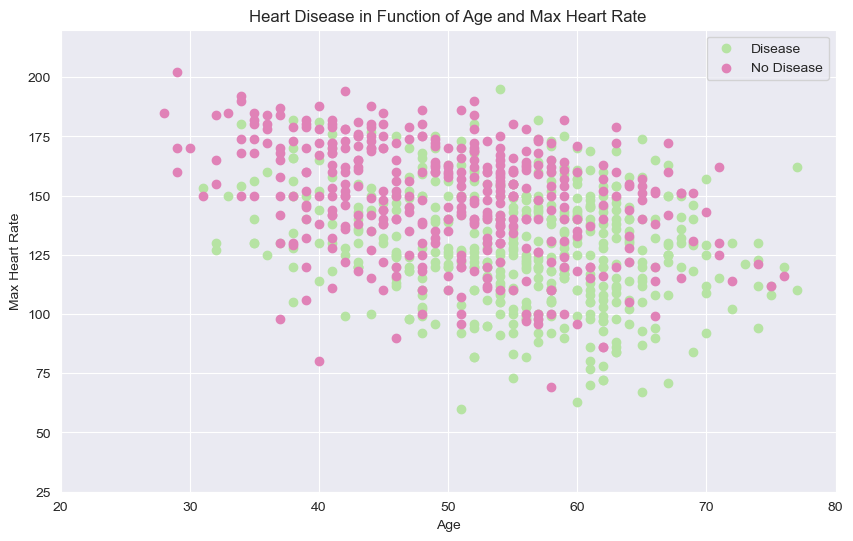

In [82]:
# Now let's plot the max heart rate vs the age
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1],
            df.thalch[df.target == 1],
            c = '#b6e3a3')

plt.scatter(df.age[df.target == 0],
            df.thalch[df.target == 0],
            c = "#e082b7")

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.xlim(20,80)
plt.ylim(25,220);

In [83]:
# Let's handle the missing values now
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [85]:
# okay so, for the object type columns we can fill the missing value with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# and for the numerical columns we can fill the missing values with the mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

/var/folders/nn/vm2682mx78j9wh7tjmqsdtl40000gn/T/ipykernel_54702/2442166073.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [86]:
# now lets take a look at the dataframe again
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0


In [87]:
# and let's check for missing values again
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now that we've cleaned the dataset and we managed the missing values problem, lets start to buid our model.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# defining the categorical and numerical columns

categorical_cols = df.select_dtypes(include = ['object']).columns.tolist()
numerical_cols = df.select_dtypes(include = ['float64', 'int64']).columns.tolist()

In [89]:
categorical_cols

['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']

In [90]:
numerical_cols

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [ ]:
# deleting the target and the id columns from the numerical columns
numerical_cols.pop()
numerical_cols.pop(0)
numerical_cols

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [92]:
# Now we're ready to make our preprocessors
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [93]:
# Now let's split our data into train and test sets

X = df[numerical_cols + categorical_cols]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Once we've done this, we can create a pipeline that will preprocess our data and then fit a model to it
from sklearn.ensemble import RandomForestClassifier

# Creating the pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Now we can fit the model to our training data
model.fit(X_train, y_train)

# And let's check the accuracy of our model on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_preds = model.predict(X_test)

accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.84


In [95]:
# That's a good accuracy, but let's take a look at the classification report
print("Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        75
           1       0.89      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



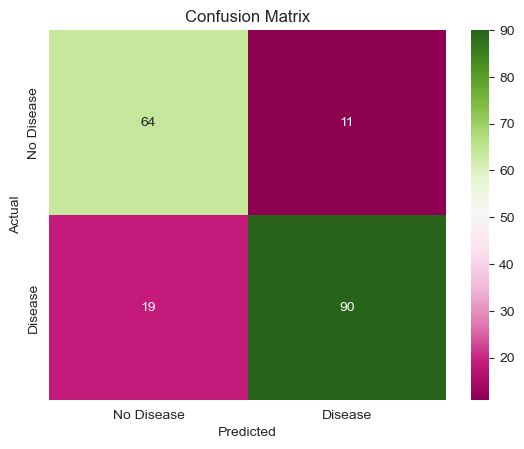

In [100]:
# and lastly, let's take a look at the confusion matrix
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

That's a solid start, but we can improve our model with hyperparameter tuning...

In [ ]:
# Let's make some hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}

# For this, we're going to create a new model but now tuned with GridSearchCV
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=1, cv = 5, param_grid = grid)))
])

# Fit the tuned model
tuned_model.fit(X_train, y_train)

y_preds_tuned = tuned_model.predict(X_test)